# QCTO - Workplace Module

### Project Title: Client Activity Segmentation 
#### Done By: Katy Sonnekus

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#five>6. Clustering</a>

<a href=#six>7. Modeling </a>

<a href=#seven>8. Evaluation and Validation</a>

<a href=#eight>9. Final Model</a>

<a href=#nine>10. Conclusion and Future Work</a>

<a href=#ten>11. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose of the project:** Insights driven client segmentation is crucial in the banking sector because it enables banks to better understand and grow their clients base. At the moment the client segmentation is based mostly on the income and age of a client.Insights driven modeling incorporates behavioral and engagement metrics such as account usage and digital activity. An insights-driven segmentation model enables banks to move from descriptive to predictive and prescriptive analytics. It supports hyper-personalization, proactive engagement, and strategic growth—far beyond what age and income alone can offer.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.feature_selection import VarianceThreshold  
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report,calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import accuracy_score, classification_report
import os

sns.set(style="whitegrid")


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **How the data was collected:** This data is a summary of transactional data at an account level such as transaction volume and number of accounts, client desciptive data such as age, gender and marital status.

* **Step 1:** In order to get a fair representaion of clients across the country first the count of records per province was calculated.

*  **Step 2:** Next the proportional sample size was determined based on the size of each province

*  **Step 3:** Clients were ranked randomly within each province. This step also included the selection of the variables selected for the dataset which are as follows:

- ID
- Suburb
- Suburb_Code
- Town
- Province
- Age
- Credit_Score
- Gender
- Marital_Status
- Tenure
- Tot_Accs
- Transaction_Volume
- Mainbank
- Product_Type
- Digitally_Active_3M_Rule
- Average_Balance
- BIS_GrossSal_Annual
- Employment_Status
- Channel_Old_App
- Channel_Old_Int
- Branch_Txn_Flag

*  **Step 4:** Finally a proportional sample was selected based on the client rank
---

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [2]:
df = pd.read_csv("Customer_DataV3.csv")
df.head()

,ID,Suburb,Suburb_Code,Town,Province,Age,Credit_Score,Gender,Marital_Status,Tenure,...,Mainbank,Product_Type,Digitally_Active_3M_Rule,Average_Balance,Monthly Income Bracket,Employment_Status,Channel_Old_App,Visited Branch,Internet Logins,Money app login band
0,1,Tweefontein-C,000748-029983,Thembisile Rural,Mpumalanga,37.0,3.0,F,Unmarried,10,...,1,Transactional,1,7.0,Bracket 1: ≤ 20000,Permanent,0,Yes,0,a. Logins - 4 or Less
1,2,Kabokweni,001108-029610,Kabokweni,Mpumalanga,33.0,3.0,F,Unmarried,11,...,0,Transactional,1,360.0,Bracket 1: ≤ 20000,NaN,0,No,0,a. Logins - 4 or Less
2,3,Embalenhle,001190-029760,Embalenhle,Mpumalanga,33.0,3.0,M,Unmarried,4,...,0,Transactional,1,1256.0,Bracket 1: ≤ 20000,Permanent,0,No,0,a. Logins - 4 or Less
3,4,Kanyamazane-A,001113-029616,Kanyamazane,Mpumalanga,43.0,3.0,F,Unmarried,12,...,0,Lending,0,108508.0,Bracket 1: ≤ 20000,Permanent,0,No,0,NaN
4,5,Middelburg,000492-015764,Middelburg,Mpumalanga,39.0,3.0,M,Unmarried,7,...,0,Transactional,1,19.0,Bracket 1: ≤ 20000,NaN,0,No,0,a. Logins - 4 or Less


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [3]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                  ID   Suburb    Suburb_Code     Town Province           Age  \
count   98319.000000    98319          98319    98319    98319  98067.000000   
unique           NaN     5374           5674      848        9           NaN   
top              NaN  Sandown  000946-018299  Sandton  Gauteng           NaN   
freq             NaN     8542           8542     9623    33782           NaN   
mean    49164.097987      NaN            NaN      NaN      NaN     39.137192   
std     28385.953142      NaN            NaN      NaN      NaN     11.550717   
min         1.000000      NaN            NaN      NaN      NaN     18.000000   
25%     24581.500000      NaN            NaN      NaN      NaN     31.000000   
50%     49163.000000      NaN            NaN      NaN      NaN     37.000000   
75%     73745.500000      NaN            NaN      NaN      NaN     45.000000   
max     98330.000000      NaN            NaN      NaN      NaN     99.000000   

        Credit_Sco

Total records - 98 330
Demographics
Age: Mean: 39 years
Range: 18 to 125 (125 seems like an outlier or data error)
Gender:Most common: Female (F) — 51,938 entries
Other categories: Likely Male (M) and Unknown (U)
Marital Status:Most common: Unmarried — 64,628 entries

Financial Behavior
Credit Score: Mean: 3.26 (likely on a scale of 1–5)
Tenure: Mean: 12.74 years Max: 125 years (again, possibly an error)
Total Accounts: Mean: 2.84 Max: 166 (high outlier)
Transaction Volume: Mean: 0.066 (likely normalized or binary)
Most values are 0 (median and 75th percentile = 0)

Banking & Product Info
Mainbank:Binary (0 or 1): 56% are with the main bank
Product Type:9 types, most common is "Transactional" — 61,702 entries
Digitally Active (3M Rule): 89% are digitally active
Financial Standing
Average Balance: Mean: R111,845
Very high standard deviation and max (R32 million), indicating outliers
Annual Gross Salary: Mean: R383,768 Max: R132 million — again, likely outliers

Employment
Employment Status:
7 categories
Most Common: Permanent — 57,873 entries

Internet Logins
Mean: 0.005 (most users have 0 logins)
Money App Login Band
Most Common: “4 or Less” — 89,802 entries

Key Observations
- Outliers in:Age, Tenure, Average Balance, Annual Salary, Total - - Accounts
- Missing Data in:Credit Score, Employment Status, Money App Login Band
- Data Types:Many binary and categorical features — good for segmentation/classification
- Data Cleaning Needed:Outlier handling, missing value imputation, and possibly recoding unknowns

In [4]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("[^A-Za-z0-9_]+", "", regex=True)

# Handle missing values
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=[object]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Remove outliers in Average_Balance using IQR
Q1 = df["Average_Balance"].quantile(0.25)
Q3 = df["Average_Balance"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["Average_Balance"] >= Q1 - 1.5 * IQR) & (df["Average_Balance"] <= Q3 + 1.5 * IQR)]

# Feature Engineering

# Age Groups
bins = [0, 17, 30, 45, 60, np.inf]
labels = ["<18", "18–30", "31–45", "46–60", "60+"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Income Brackets
df["Income_Bracket"] = df["Monthly_Income_Bracket"].str.extract(r"(Bracket\s\d+|\> R\d+)")

# RFM Metrics
df["RFM_Frequency"] = df["Transaction_Volume"]
df["RFM_Recency"] = df["Tenure"]
df["RFM_Monetary"] = df["Average_Balance"]

# Digital Engagement Score
login_band_map = {
    "a. Logins - 4 or Less": 1,
    "b. Logins - 5 to 14": 2,
    "c. Logins - 15 to 29": 3,
    "d. Logins - 30 to 59": 4,
    "e. Logins - 60 or More": 5
}
df["Login_Band_Score"] = df["Money_app_login_band"].map(login_band_map).fillna(0)
df["Digital_Engagement_Score"] = df["Internet_Logins"] + df["Login_Band_Score"]

# Product Holding Count
df["Product_Holding_Count"] = df["Product_Type"].apply(lambda x: len(str(x).split(",")))

# Final cleaned DataFrame
cleaned_df = df

In [5]:
cleaned_df

,ID,Suburb,Suburb_Code,Town,Province,Age,Credit_Score,Gender,Marital_Status,Tenure,...,Internet_Logins,Money_app_login_band,Age_Group,Income_Bracket,RFM_Frequency,RFM_Recency,RFM_Monetary,Login_Band_Score,Digital_Engagement_Score,Product_Holding_Count
0,1,Tweefontein-C,000748-029983,Thembisile Rural,Mpumalanga,37.0,3.0,F,Unmarried,10,...,0,a. Logins - 4 or Less,31–45,Bracket 1,0,10,7.0,1.0,1.0,1
1,2,Kabokweni,001108-029610,Kabokweni,Mpumalanga,33.0,3.0,F,Unmarried,11,...,0,a. Logins - 4 or Less,31–45,Bracket 1,0,11,360.0,1.0,1.0,1
2,3,Embalenhle,001190-029760,Embalenhle,Mpumalanga,33.0,3.0,M,Unmarried,4,...,0,a. Logins - 4 or Less,31–45,Bracket 1,0,4,1256.0,1.0,1.0,1
4,5,Middelburg,000492-015764,Middelburg,Mpumalanga,39.0,3.0,M,Unmarried,7,...,0,a. Logins - 4 or Less,31–45,Bracket 1,0,7,19.0,1.0,1.0,1
5,6,Kwaggafontein A,000748-029955,Thembisile Rural,Mpumalanga,28.0,2.0,M,Unmarried,7,...,0,a. Logins - 4 or Less,18–30,Bracket 1,0,7,4.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98314,98326,Sandown,000946-018299,Sandton,Gauteng,27.0,2.0,F,Unmarried,5,...,0,a. Logins - 4 or Less,18–30,Bracket 1,0,5,10.0,1.0,1.0,1
98315,98327,Fourways,000946-012019,Sandton,Gauteng,35.0,3.0,F,Unmarried,18,...,0,a. Logins - 4 or Less,31–45,Bracket 5,0,18,31936.0,1.0,1.0,1
98316,98328,Germiston,000223-020162,Germiston,Gauteng,40.0,3.0,F,Unmarried,13,...,0,a. Logins - 4 or Less,31–45,Bracket 1,0,13,3444.0,1.0,1.0,1
98317,98329,Sandown,000946-018299,Sandton,Gauteng,32.0,2.0,F,Customary Marriage,5,...,0,a. Logins - 4 or Less,31–45,Bracket 1,0,5,5.0,1.0,1.0,1


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


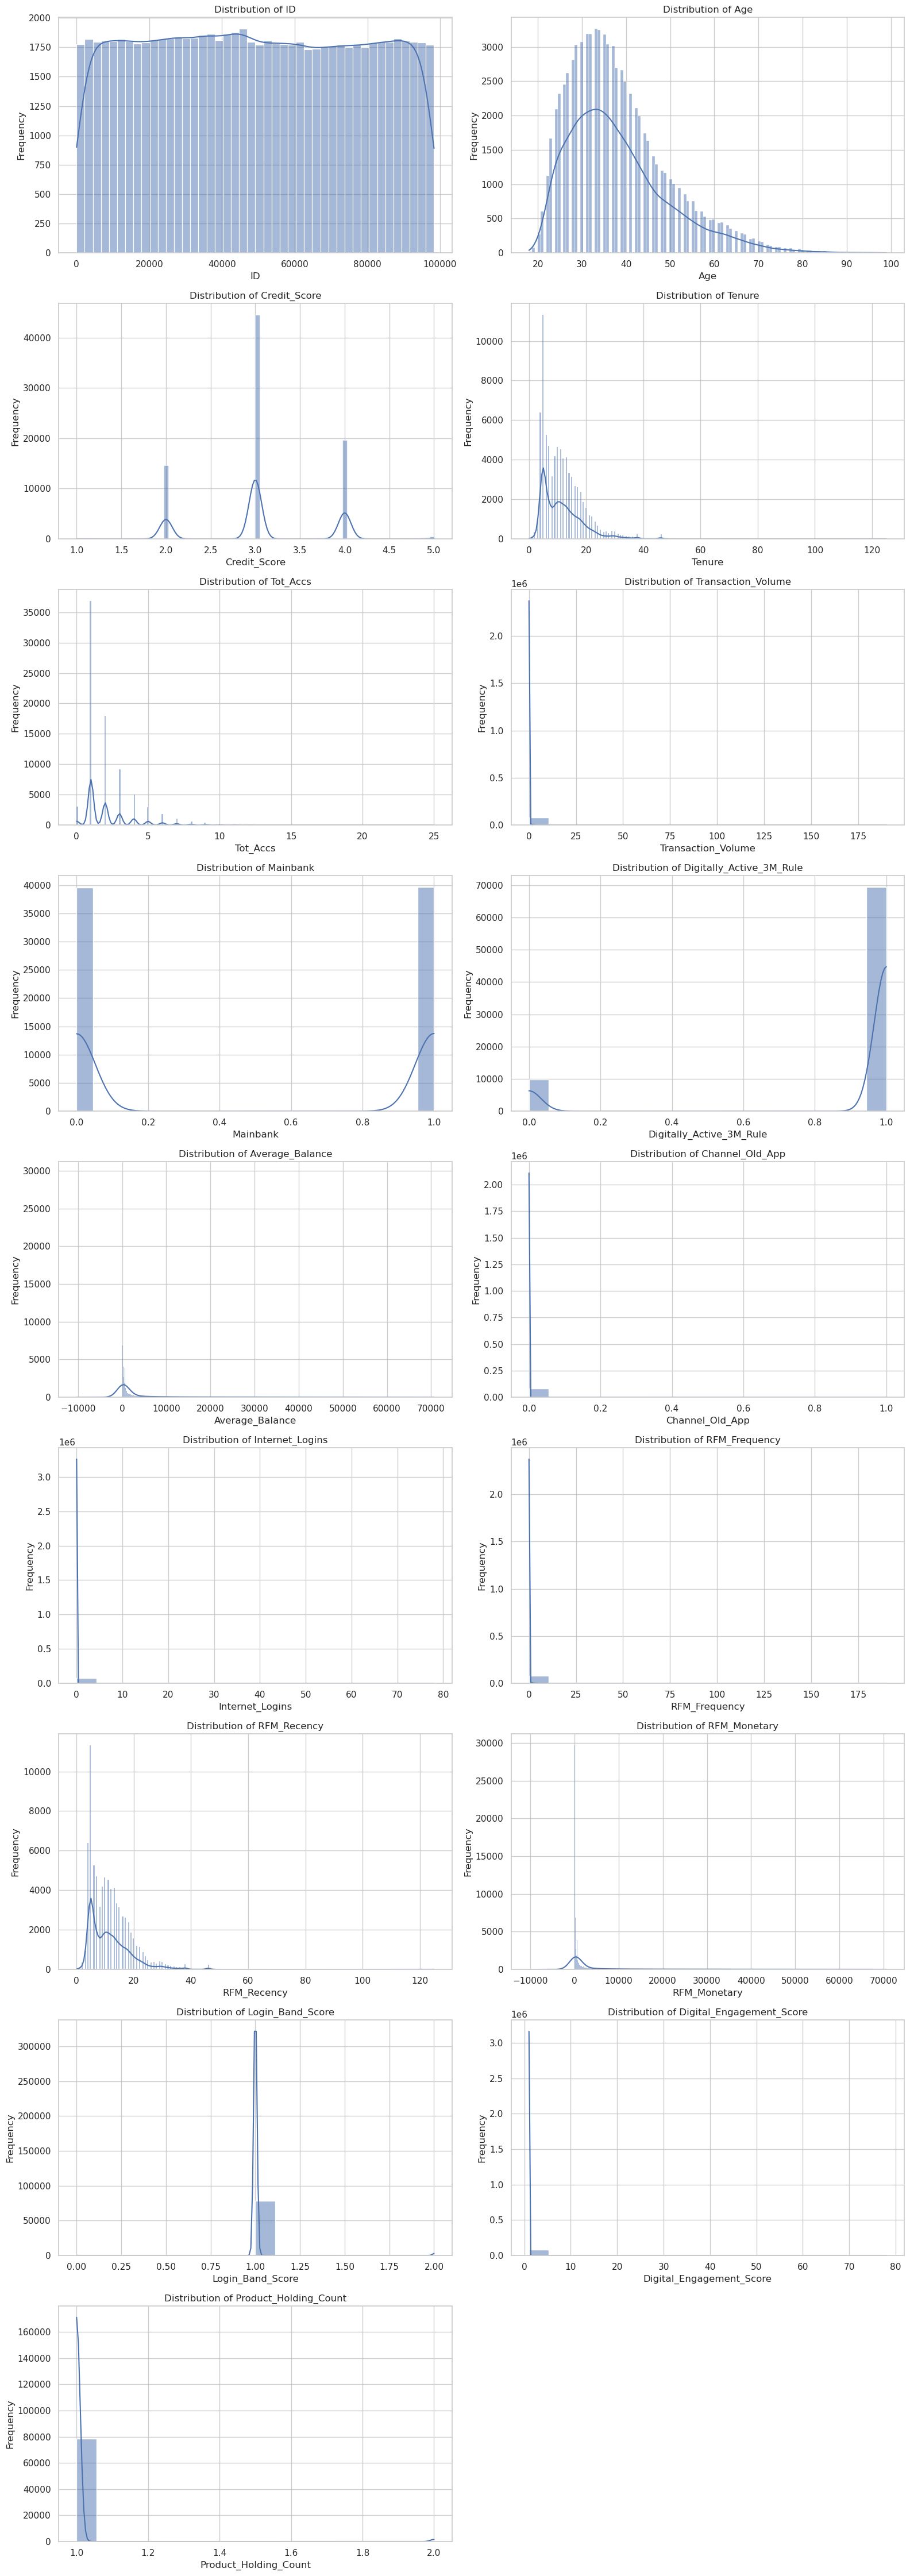

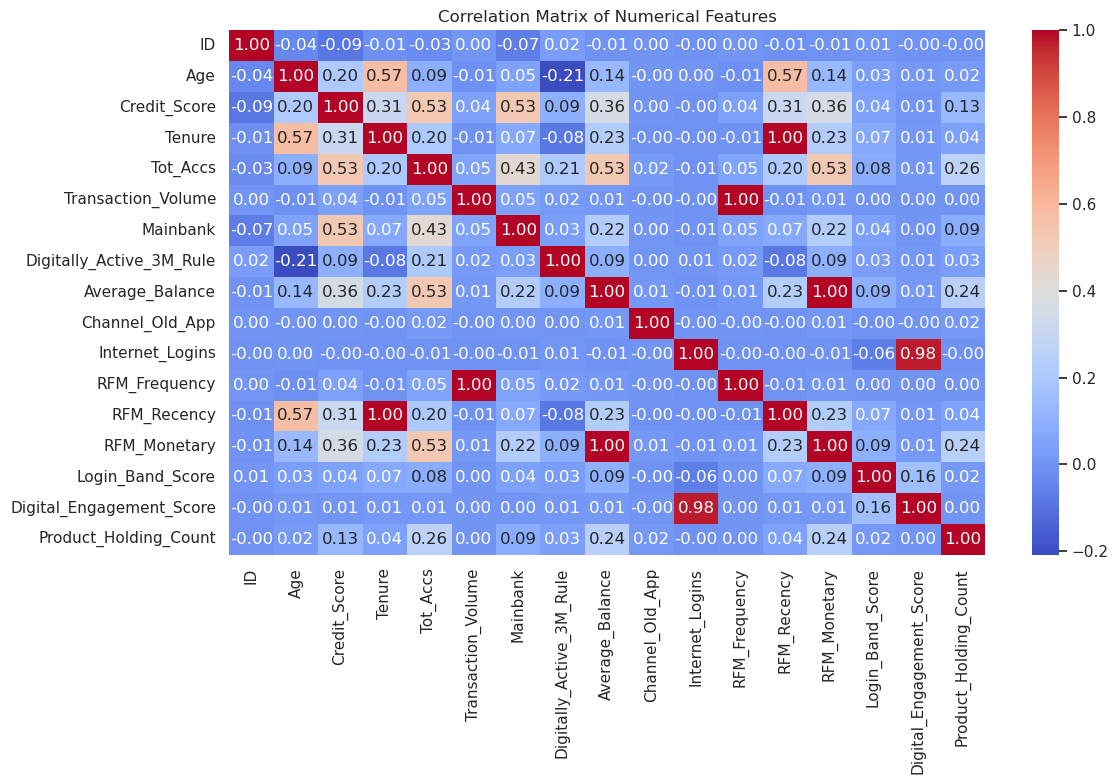

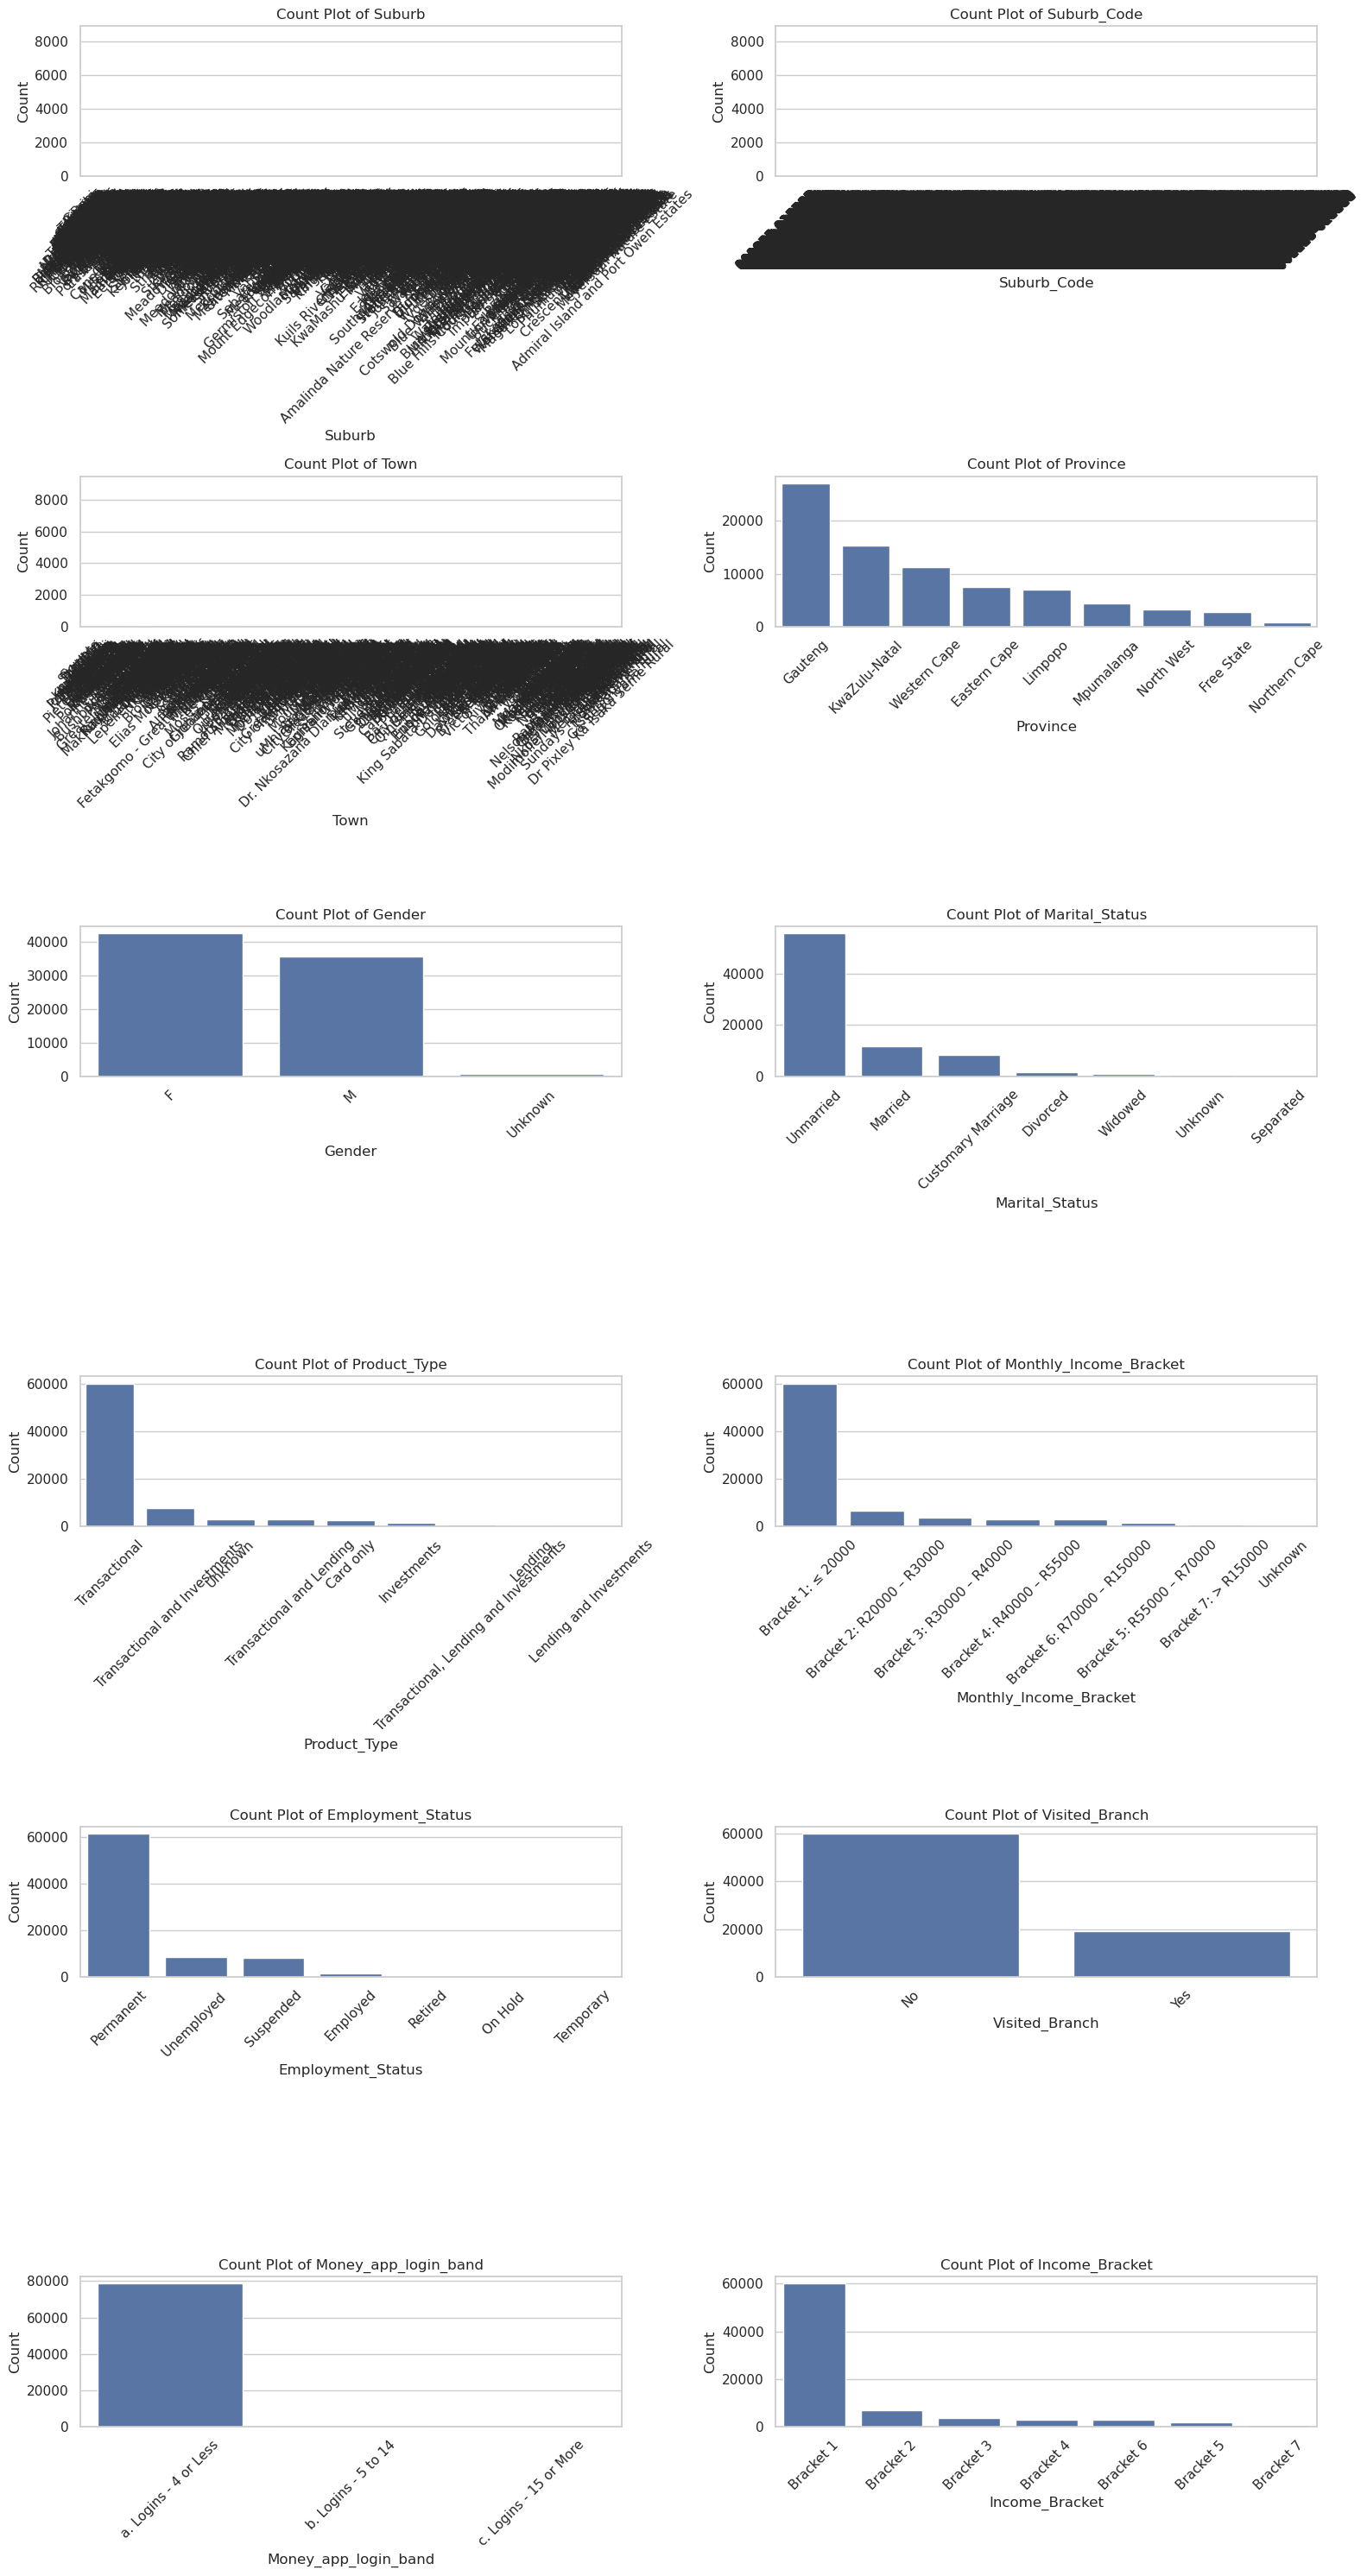


Insights:
1. The dataset contains a mix of numerical and categorical features, suitable for clustering after preprocessing.
2. Numerical features such as 'Transaction_Volume', 'Total_Accounts', and 'Average_Balance' show right-skewed distributions, indicating a concentration of lower values with some high outliers.
3. 'Credit_Score' displays a multi-modal distribution, suggesting distinct customer segments.
4. Strong positive correlations exist between 'Login_Band_Score' and 'Digital_Engagement_Score' (0.98), and between 'RFM_Monetary' and 'Transaction_Volume' (0.53), indicating potential redundancy or behavioral links.
5. Categorical features like 'Employment_Status', 'Visited_Branch', and 'Money_App_Login_Band' show dominant categories, with most users being permanently employed and digitally engaged.
6. 'Income_Bracket' and 'Province' distributions highlight a concentration in lower income groups and Gauteng respectively.
7. Missing values are present in 'Employment_Status' and pos

In [6]:
# Distribution plots for numerical features
numerical_features = cleaned_df.select_dtypes(include=['int64', 'float64']).columns
num_num = len(numerical_features)
cols = 2
rows = math.ceil(num_num / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
num_cat = len(categorical_features)

if num_cat > 0:
    cols = 2
    rows = math.ceil(num_cat / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_features):
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Count Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Insights
print("\nInsights:")
print("1. The dataset contains a mix of numerical and categorical features, suitable for clustering after preprocessing.")
print("2. Numerical features such as 'Transaction_Volume', 'Total_Accounts', and 'Average_Balance' show right-skewed distributions, indicating a concentration of lower values with some high outliers.")
print("3. 'Credit_Score' displays a multi-modal distribution, suggesting distinct customer segments.")
print("4. Strong positive correlations exist between 'Login_Band_Score' and 'Digital_Engagement_Score' (0.98), and between 'RFM_Monetary' and 'Transaction_Volume' (0.53), indicating potential redundancy or behavioral links.")
print("5. Categorical features like 'Employment_Status', 'Visited_Branch', and 'Money_App_Login_Band' show dominant categories, with most users being permanently employed and digitally engaged.")
print("6. 'Income_Bracket' and 'Province' distributions highlight a concentration in lower income groups and Gauteng respectively.")
print("7. Missing values are present in 'Employment_Status' and possibly others, requiring imputation before modeling.")
print("8. The data is well-positioned for clustering after encoding categorical variables, scaling numerical features, and possibly reducing dimensionality based on correlation insights.")



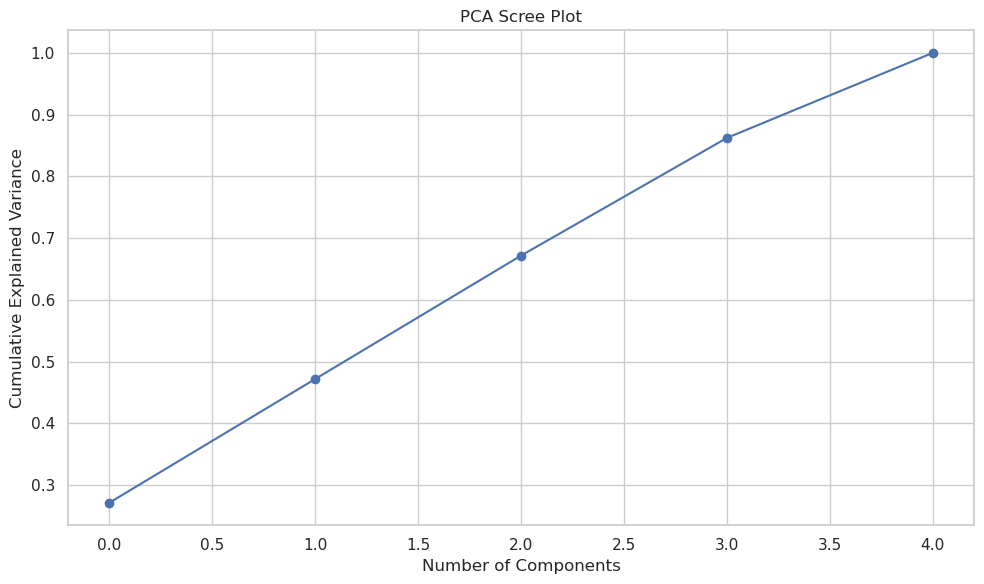

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Profiling:
          RFM_Frequency  RFM_Recency  RFM_Monetary  Digital_Engagement_Score  \
Cluster                                                                       
0             0.065405    10.849130   1592.883703                  1.009358   
1             0.068605    18.348391  38999.130435                  1.035291   
2             0.116866    14.900398  36529.099602                  1.023904   
3             0.000000     8.666667     46.333333                 56.000000   

         Product_Holding_Count  
Cluster                         
0                          1.0  
1                          1.0  
2                          2.0  
3                          1.0  


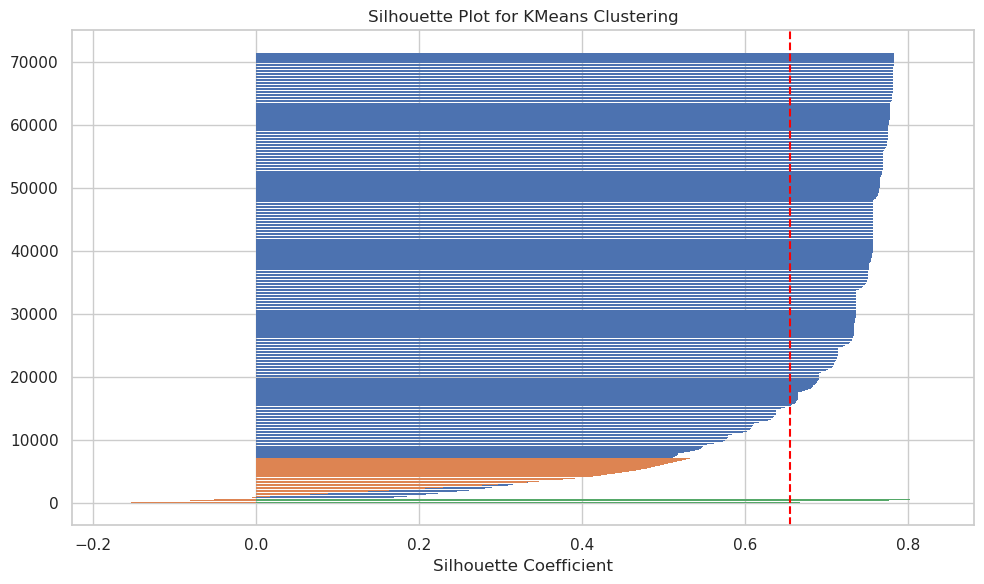

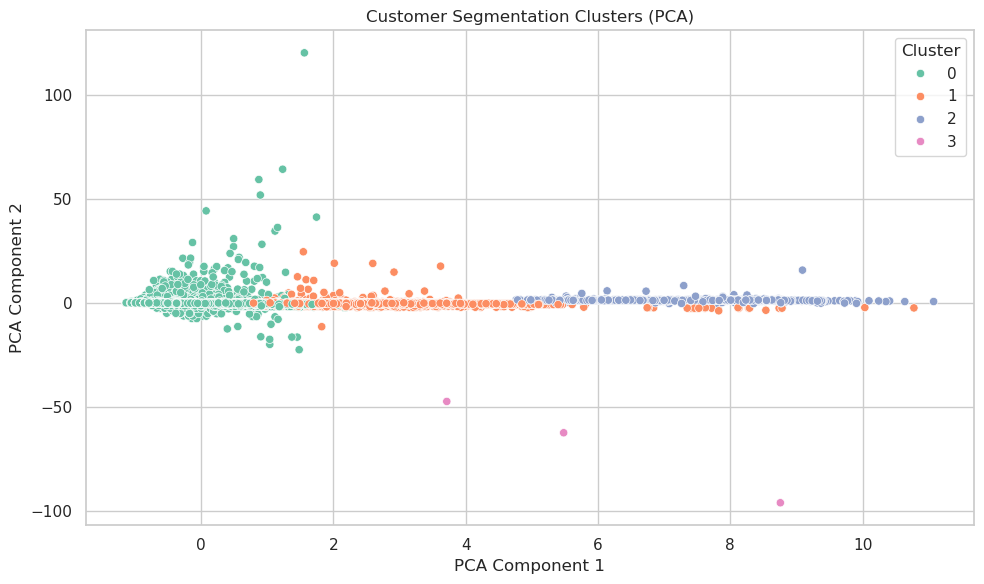

NameError: name 'DBSCAN' is not defined

In [10]:

# ------------------ Segmentation Clues ------------------
features_for_clustering = ['RFM_Frequency', 'RFM_Recency', 'RFM_Monetary', 'Digital_Engagement_Score', 'Product_Holding_Count']
X = df[features_for_clustering].fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scree plot for PCA
pca_full = PCA()
pca_full.fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('PCA Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster profiling
cluster_summary = df.groupby('Cluster')[features_for_clustering].mean()
print("Cluster Profiling:\n", cluster_summary)

# Silhouette plot
silhouette_vals = silhouette_samples(X_scaled, df['Cluster'])
plt.figure(figsize=(10, 6))
for i in range(4):
    cluster_vals = silhouette_vals[df['Cluster'] == i]
    cluster_vals.sort()
    plt.barh(range(len(cluster_vals)), cluster_vals, edgecolor='none')
plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
plt.title('Silhouette Plot for KMeans Clustering')
plt.xlabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

# Visualize clusters using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segmentation Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

# Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method='ward')
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Compare clustering methods
comparison = df[['Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']]
print("Clustering Method Comparison:\n", comparison.value_counts())

# Outlier detection from DBSCAN
outliers = df[df['DBSCAN_Cluster'] == -1]
print(f"Number of outliers detected by DBSCAN: {len(outliers)}")


---
<a href=#six></a>
## **Clustering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


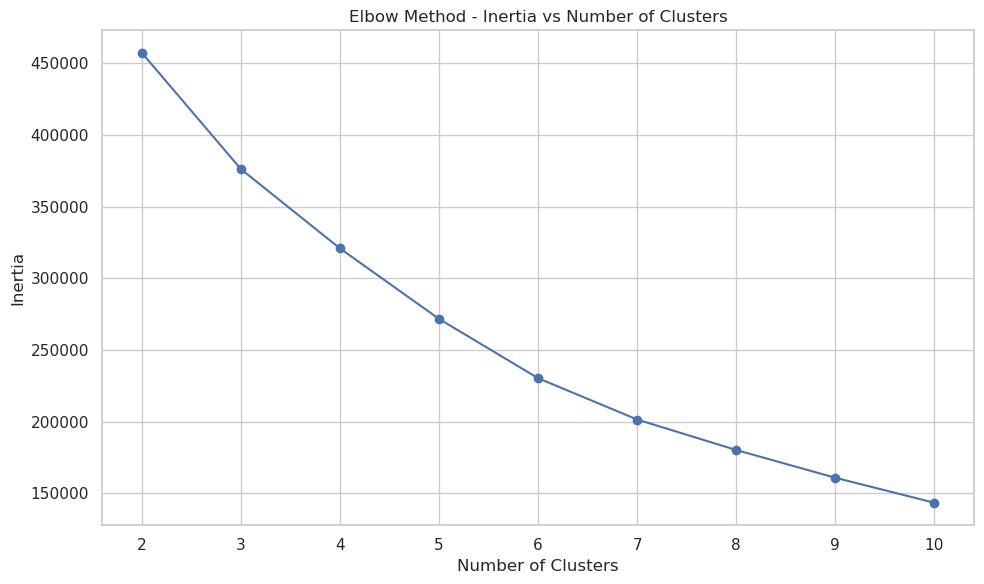

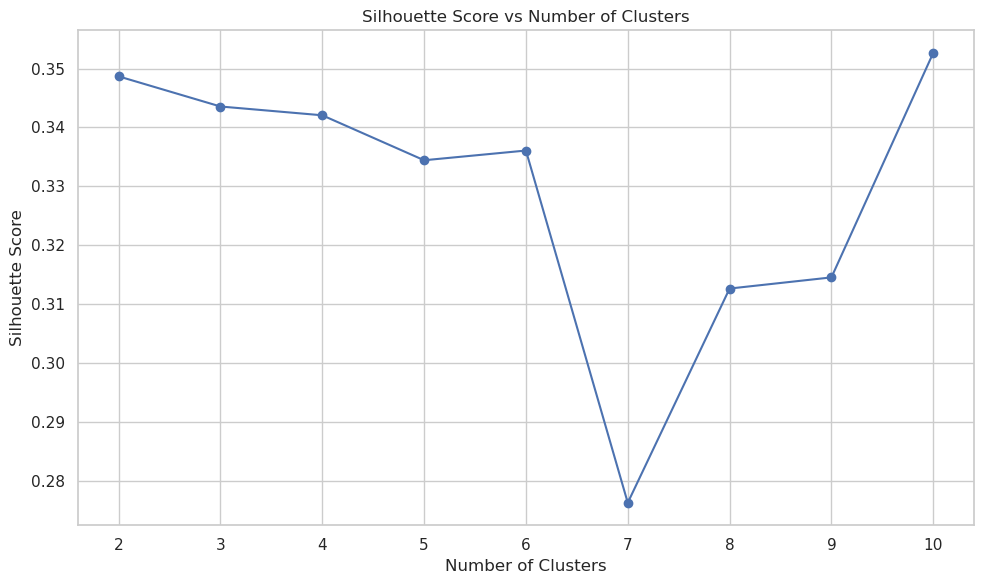

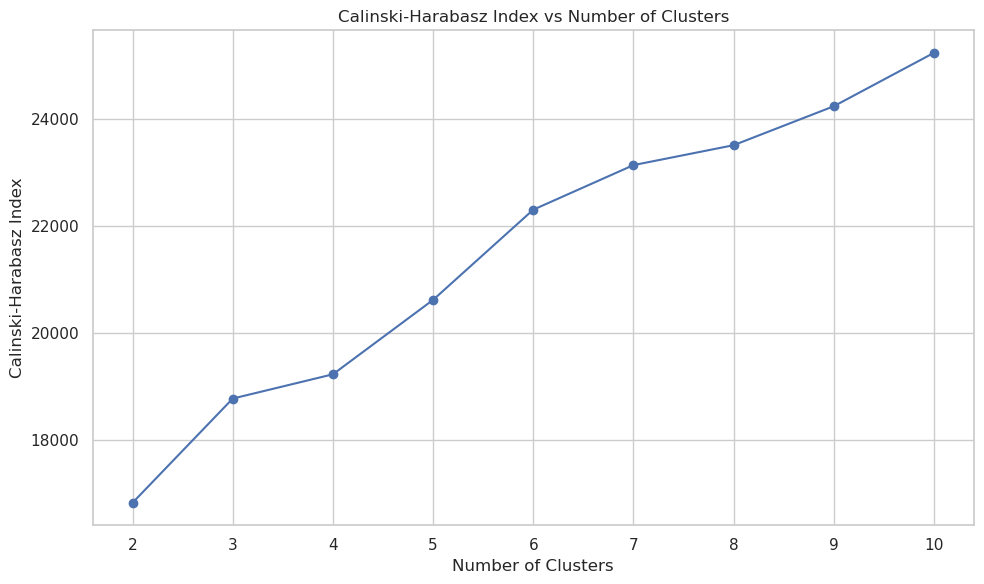

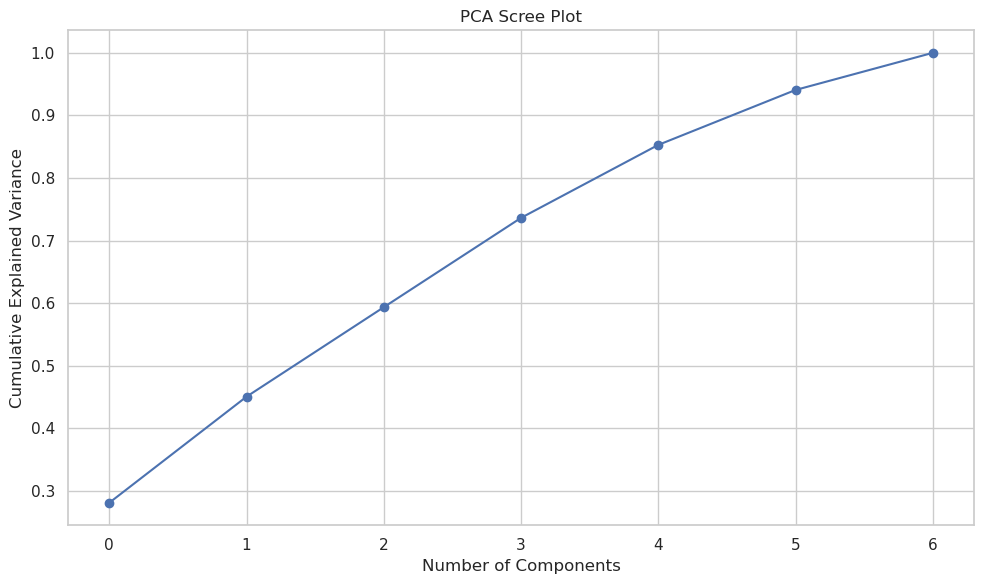

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Profiling:
                 RFM_Frequency  RFM_Recency  RFM_Monetary  \
KMeans_Cluster                                             
0                    0.105775    17.666811  11858.402264   
1                    0.000000     8.666667     46.333333   
2                    0.043779     8.168690   1203.403651   
3                    0.116866    14.900398  36529.099602   

                Digital_Engagement_Score  Product_Holding_Count        Age  \
KMeans_Cluster                                                               
0                               1.018314                    1.0  47.378830   
1                              56.000000                    1.0  51.000000   
2                               1.008082                    1.0  32.993022   
3                               1.023904                    2.0  40.646746   

                Credit_Score  
KMeans_Cluster                
0                   3.535619  
1                   3.000000  
2                   2.8049

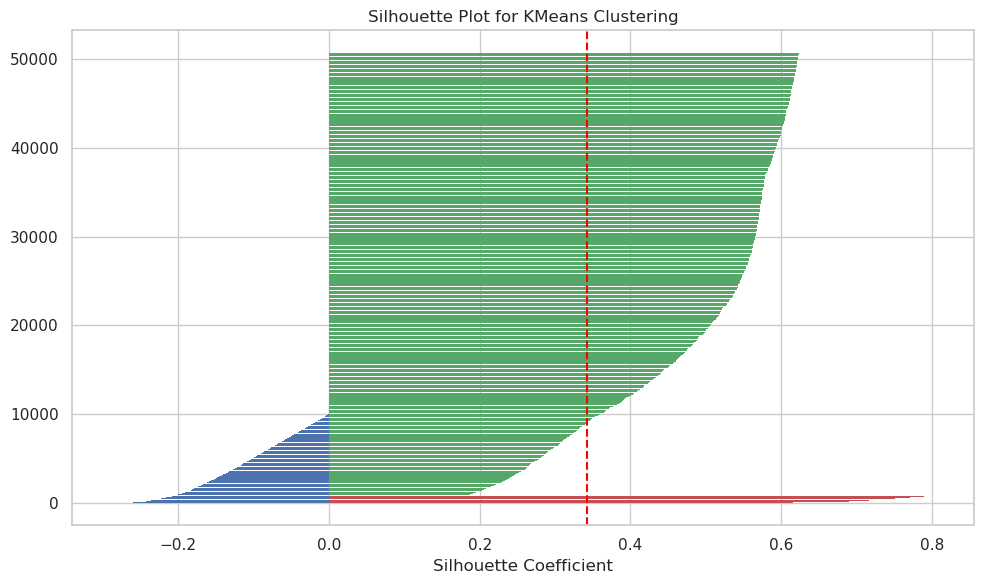

Clustering Method Comparison:
 KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster
2               1                      0                48042
0               4                      0                21567
                1                      0                 5630
2               4                      0                 2474
3               2                      2                  709
0               4                      1                  379
                                      -1                  116
2               4                      1                  105
3               2                     -1                   43
2               4                     -1                   38
                                       3                   33
0               1                     -1                   29
2               4                      5                   13
                                       4                   13
                1                     -1        

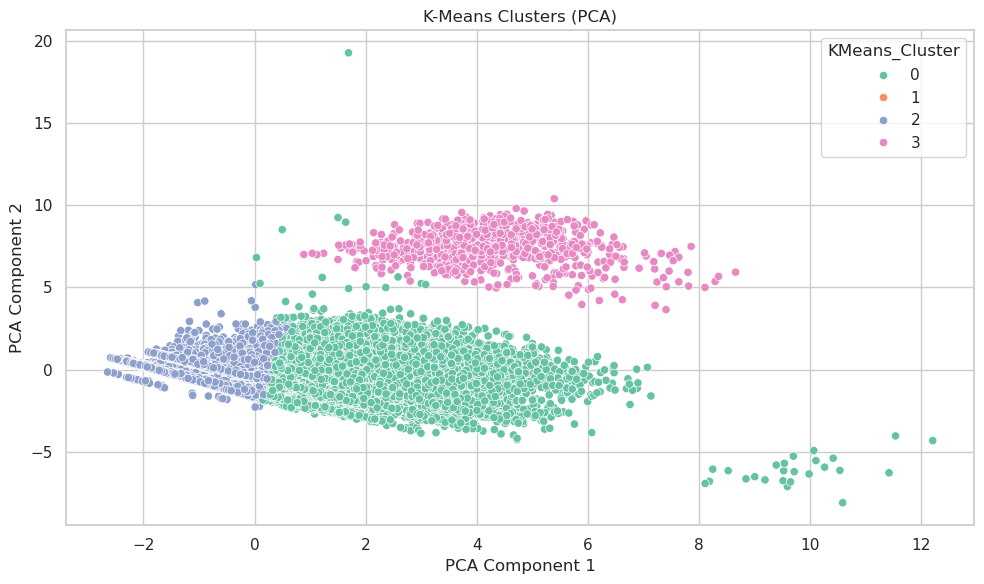

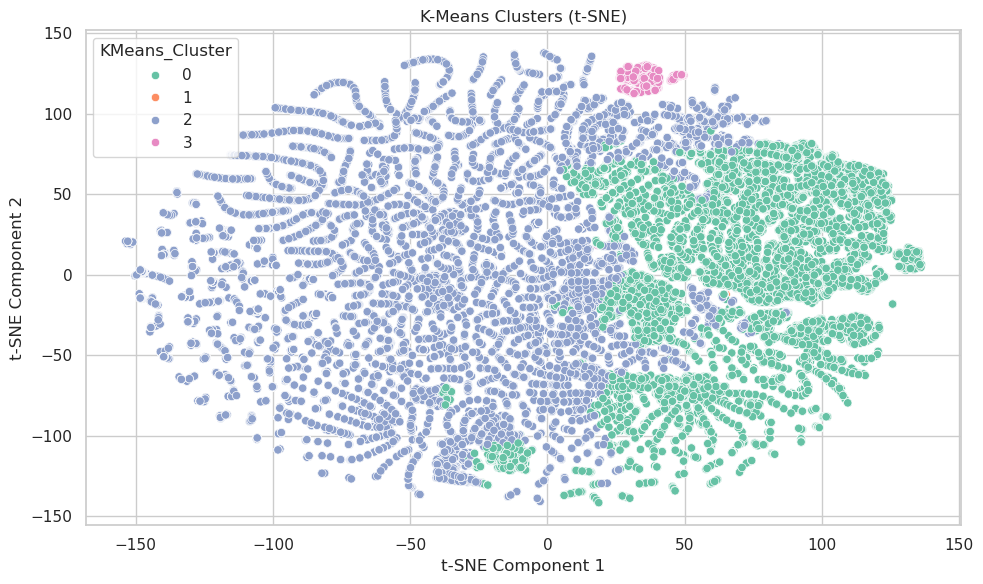

In [10]:

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster


# ------------------ Feature Selection & Scaling ------------------
features_for_clustering = ['RFM_Frequency', 'RFM_Recency', 'RFM_Monetary',
                           'Digital_Engagement_Score', 'Product_Holding_Count',
                           'Age', 'Credit_Score']
X = df[features_for_clustering].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------ Cluster Evaluation ------------------
inertia = []
silhouette_scores = []
calinski_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    calinski_scores.append(calinski_harabasz_score(X_scaled, labels))

# Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

# Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Calinski-Harabasz Index
plt.figure(figsize=(10, 6))
plt.plot(K_range, calinski_scores, marker='o')
plt.title('Calinski-Harabasz Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.tight_layout()
plt.show()

# ------------------ Dimensionality Reduction ------------------
# PCA Scree Plot
pca_full = PCA()
pca_full.fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('PCA Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

# Apply PCA and t-SNE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# ------------------ Clustering ------------------
# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Hierarchical
linkage_matrix = linkage(X_scaled, method='ward')
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# ------------------ Cluster Profiling ------------------
cluster_summary = df.groupby('KMeans_Cluster')[features_for_clustering].mean()
print("Cluster Profiling:\n", cluster_summary)

# ------------------ Silhouette Plot ------------------
silhouette_vals = silhouette_samples(X_scaled, df['KMeans_Cluster'])
plt.figure(figsize=(10, 6))
for i in range(4):
    cluster_vals = silhouette_vals[df['KMeans_Cluster'] == i]
    cluster_vals.sort()
    plt.barh(range(len(cluster_vals)), cluster_vals, edgecolor='none')
plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
plt.title('Silhouette Plot for KMeans Clustering')
plt.xlabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

# ------------------ Cluster Comparison ------------------
comparison = df[['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']]
print("Clustering Method Comparison:\n", comparison.value_counts())

# ------------------ Outlier Detection ------------------
outliers = df[df['DBSCAN_Cluster'] == -1]
print(f"Number of outliers detected by DBSCAN: {len(outliers)}")

# ------------------ Cluster Visualization ------------------
# PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='Set2')
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

# t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['KMeans_Cluster'], palette='Set2')
plt.title('K-Means Clusters (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()


Key Insights:

Cluster 3 is your most valuable segment: high RFM metrics, more products, and strong credit scores.
Cluster 1 is anomalous: extremely high digital engagement but almost no monetary value — possibly test accounts, students, or dormant users.
Cluster 2 is young and low-value, potentially early-stage customers.
Cluster 0 is older, mid-value, with low engagement — may benefit from reactivation campaigns.

Clustering Method Comparison
This shows how different clustering algorithms (KMeans, Hierarchical, DBSCAN) grouped the same customers.
🧠 Observations:

KMeans Cluster 2 is the largest group (48,042), mostly aligned with Hierarchical Cluster 1 and DBSCAN Cluster 0.
KMeans Cluster 0 also has strong overlap with Hierarchical Cluster 4.
DBSCAN identified 240 outliers (-1 label), which may be noise or edge cases.
Some clusters show cross-method consistency, which validates the segmentation.
Others (e.g., Cluster 1 with DBSCAN -1) suggest method disagreement, possibly due to density or scale sensitivity.



In [11]:
features_for_clustering = [
    'RFM_Frequency', 'RFM_Recency', 'RFM_Monetary',
    'Digital_Engagement_Score', 'Product_Holding_Count',
    'Age', 'Credit_Score'
]

X = cleaned_df[features_for_clustering].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
cleaned_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
cluster_profiles = cleaned_df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'median'],
    'Tenure': ['mean', 'median'],
    'Credit_Score': ['mean', 'median'],
    'Digital_Engagement_Score': ['mean', 'median'],
    'Product_Holding_Count': ['mean', 'median'],
    'RFM_Monetary': ['mean', 'median'],
    'Income_Bracket': lambda x: x.mode()[0],
    'Age_Group': lambda x: x.mode()[0]
})

# Flatten column names
cluster_profiles.columns = ['_'.join(col).strip() for col in cluster_profiles.columns.values]

# Save or display
cluster_profiles.to_csv("cluster_profiles_summary.csv")
print(cluster_profiles)


                 Age_mean  Age_median  Tenure_mean  Tenure_median  \
KMeans_Cluster                                                      
0               47.378830        46.0    17.666811           17.0   
1               51.000000        60.0     8.666667           10.0   
2               32.993022        32.0     8.168690            7.0   
3               40.646746        39.0    14.900398           13.0   

                Credit_Score_mean  Credit_Score_median  \
KMeans_Cluster                                           
0                        3.535619                  4.0   
1                        3.000000                  3.0   
2                        2.804955                  3.0   
3                        3.993360                  4.0   

                Digital_Engagement_Score_mean  \
KMeans_Cluster                                  
0                                    1.018314   
1                                   56.000000   
2                                    1.0

### Cluster 0: "Steady Savers"
- Traits: Older, long-tenured, moderate financial value, low digital engagement
- Why this name? Reflects their loyalty and consistent banking behavior over time.
### Cluster 1: "Digital Drifters"
- Traits: Young, extremely high digital engagement, low financial value
- Why this name? They’re highly active online but not deeply invested financially.
### Cluster 2: "Emerging Explorers"
- Traits: Young, low tenure, low engagement and value
- Why this name? They’re new to the bank and may be exploring options — potential for growth.
### Cluster 3: "Prime Partners"
- Traits: Mid-age, high tenure, high financial value, strong credit, multiple products
- Why this name? These are ideal customers with strong relationships and high value.

GeoPanda Modelling

In [13]:
!pip install geopandas
import geopandas as gpd

  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyogrio-0.11.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (5.3 kB)
  Using cached pyproj-3.7.2-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (31 kB)
Using cached geopandas-1.1.1-py3-none-any.whl (338 kB)
Using cached pyogrio-0.11.1-cp311-cp311-manylinux_2_28_x86_64.whl (27.7 MB)
Using cached pyproj-3.7.2-cp311-cp311-manylinux_2_28_x86_64.whl (9.5 MB)


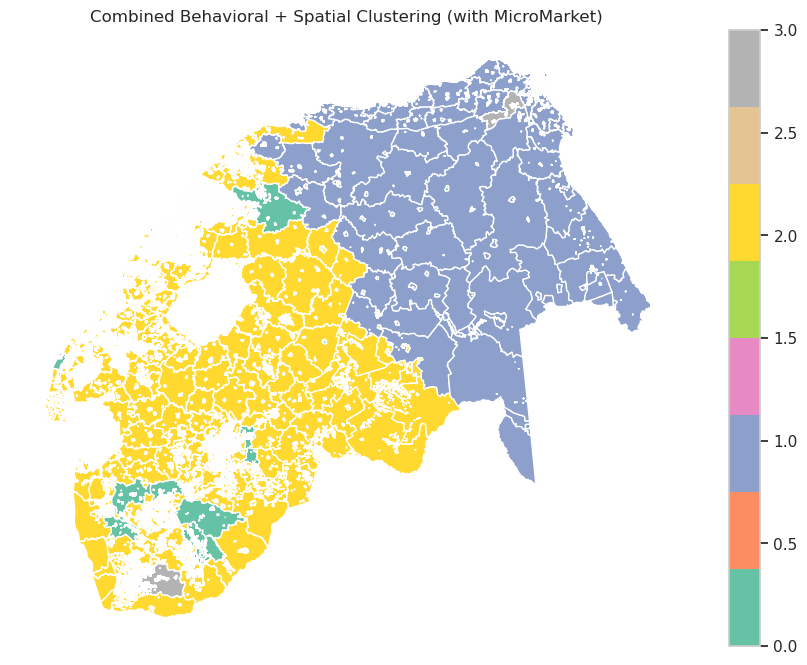

Cluster Profiles:
                   RFM_Recency  RFM_Frequency  RFM_Monetary  \
Combined_Cluster                                             
0                   19.276590       0.097324  14074.656565   
1                   12.024239       0.067234   5901.912104   
2                    8.596174       0.053861   1437.507148   
3                   14.900398       0.116866  36529.099602   

                  Digital_Engagement_Score  Product_Holding_Count        Age  \
Combined_Cluster                                                               
0                                 1.030535                    1.0  49.942589   
1                                 1.013749                    1.0  38.207661   
2                                 1.007768                    1.0  33.758646   
3                                 1.023904                    2.0  40.646746   

                  Credit_Score     longitude      latitude  
Combined_Cluster                                            
0    

/tmp/ipykernel_203/2898479537.py:77: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_df.to_file("clustered_geo_customers.shp")
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Province' to 'Province_1'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Marital_Status' to 'Marital_St'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Transaction_Volume' to 'Transactio'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Product_Type' to 'Product_Ty'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Digitally_Active_3M_Rule' to 'Digitally_'
  ogr_write(
/opt/conda/lib/python3.11/site-pac

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ------------------ Load Geospatial Data ------------------
gdf_suburbs = gpd.read_file("AG_suburbs_region.shp")

# ------------------ Merge with Customer Data ------------------
geo_df = gdf_suburbs.merge(cleaned_df, left_on="AG_SUBURB_", right_on="Suburb_Code", how="left")

# ------------------ Reproject and Add Centroid Coordinates ------------------
geo_df = geo_df.to_crs(epsg=2055)  # Hartebeesthoek94 / Lo33
geo_df["longitude"] = geo_df.geometry.centroid.x
geo_df["latitude"] = geo_df.geometry.centroid.y

# ------------------ Define Features ------------------
numeric_features = [
    'RFM_Recency', 'RFM_Frequency', 'RFM_Monetary',
    'Digital_Engagement_Score', 'Product_Holding_Count',
    'Age', 'Credit_Score', 'longitude', 'latitude'
]
categorical_features = ['MICRO_MARK']  # MicroMarket column

# ------------------ Prepare Data ------------------
geo_df[categorical_features] = geo_df[categorical_features].fillna('Unknown')
X = geo_df[numeric_features + categorical_features]

# ------------------ Preprocessing Pipeline ------------------
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', numeric_imputer),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', categorical_imputer),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ]
)

# ------------------ Apply Preprocessing ------------------
X_processed = preprocessor.fit_transform(X)

# ------------------ Apply KMeans Clustering ------------------
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
geo_df["Combined_Cluster"] = kmeans.fit_predict(X_processed)

# ------------------ Visualize Clusters on Map ------------------
geo_df.plot(column='Combined_Cluster', cmap='Set2', legend=True, figsize=(12, 8))
plt.title("Combined Behavioral + Spatial Clustering (with MicroMarket)")
plt.axis('off')
plt.show()

# ------------------ Cluster Profiling ------------------
cluster_profiles = geo_df.groupby('Combined_Cluster')[numeric_features].mean()
print("Cluster Profiles:\n", cluster_profiles)

# ------------------ Rename Columns ------------------
geo_df = geo_df.rename(columns={
    'Suburb_Code': 'SuburbCod',
    'Credit_Score': 'CredScore',
    'Digital_Engagement_Score': 'DigEngage',
    'Product_Holding_Count': 'ProdHold',
    'RFM_Monetary': 'RFMValue',
    'Combined_Cluster': 'ClusterID'
})

# ------------------ Export Results ------------------
geo_df.to_file("clustered_geo_customers.shp")
geo_df.to_csv("clustered_geo_customers.csv", index=False)
geo_df.to_file("clustered_geo_customers.geojson", driver="GeoJSON")

In [15]:
# Compare kMeans_Cluster vs Combined_Clutster
comparison = geo_df[['KMeans_Cluster', 'ClusterID']]
print(comparison.value_counts())

KMeans_Cluster  ClusterID
2.0             2            43295
0.0             0            17485
2.0             1             7437
0.0             1             5146
                2             5107
3.0             3              753
1.0             0                3
Name: count, dtype: int64


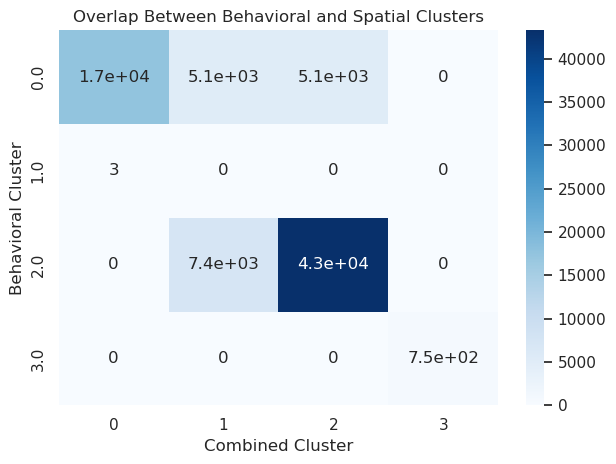

In [16]:
# Visualise Cluste Overlap
cluster_overlap = pd.crosstab(geo_df['KMeans_Cluster'], geo_df['ClusterID'])
sns.heatmap(cluster_overlap, annot=True, cmap='Blues')
plt.title("Overlap Between Behavioral and Spatial Clusters")
plt.xlabel("Combined Cluster")
plt.ylabel("Behavioral Cluster")
plt.tight_layout()
plt.show()


In [17]:
# Label Clusters
geo_df['Cluster_Label'] = geo_df['ClusterID'].map({
    0: 'Mid-Value Mature Customers',       # Moderate spend, older age, decent credit
    1: 'Young Growth Segment',             # Younger, emerging, moderate spend
    2: 'Low Engagement / At-Risk',         # Lowest spend, youngest, lowest credit
    3: 'High Value Multi-Product Users'    # Highest spend, most products, strong credit
})


---
<a href=#six></a>
## **Modeling with Evaluation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Confusion Matrix:
[[ 5161    76     0     0     0     8     0     0     0]
 [    2  1244     0     0   294     4     0     0     0]
 [   44     0   108     0     0  1380     0     0     0]
 [    1     0     0     0     0     0     0     0     0]
 [    0   183     0     0  2041     7     0     0     0]
 [   11     0    39     0    15 12924     0     0     0]
 [    5    10     0     0     1     0   210     0     0]
 [    0     0     0     0     0     0     0   379     0]
 [    0     0     0     0     0     0     0     0  4941]]


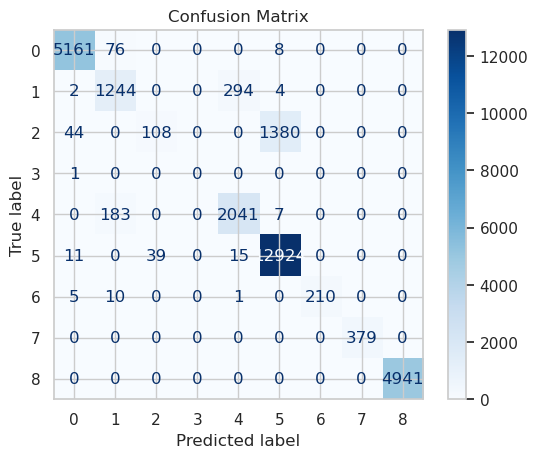

Classification Report:


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       0.0_0      0.988     0.984     0.986      5245
       0.0_1      0.822     0.806     0.814      1544
       0.0_2      0.735     0.070     0.129      1532
       1.0_0      0.000     0.000     0.000         1
       2.0_1      0.868     0.915     0.891      2231
       2.0_2      0.902     0.995     0.946     12989
       3.0_3      1.000     0.929     0.963       226
       nan_1      1.000     1.000     1.000       379
       nan_2      1.000     1.000     1.000      4941

    accuracy                          0.928     29088
   macro avg      0.813     0.744     0.748     29088
weighted avg      0.921     0.928     0.909     29088



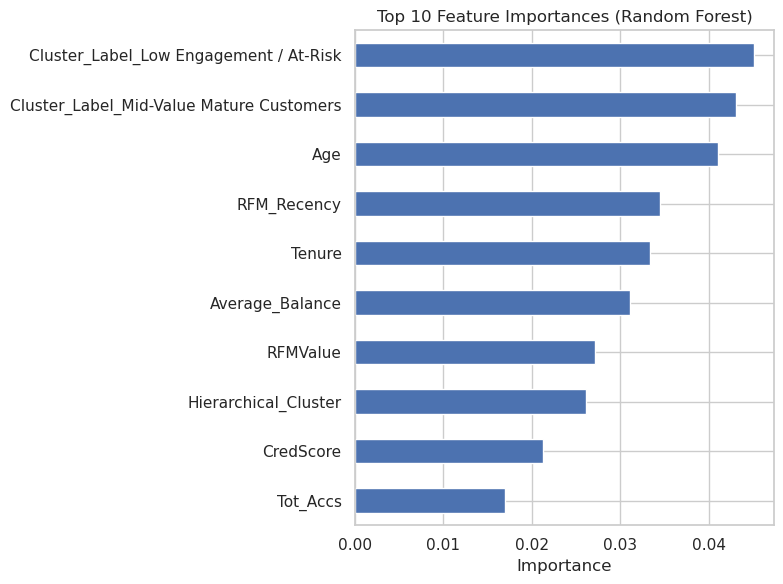

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Create a combined segment label
geo_df['segment'] = (
    geo_df['KMeans_Cluster'].astype(str) + '_' +
    geo_df['ClusterID'].astype(str)
)

# 2. Prepare data for classification
drop_cols = [
    'ID', 'segment', 'KMeans_Cluster', 'ClusterID', 'geometry'
    # add any other columns you don't want as features
]
X = geo_df.drop(columns=[col for col in drop_cols if col in geo_df.columns], errors='ignore')
y = geo_df['segment']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# 3. Preprocessing pipeline with imputers
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ]), categorical_cols)
])

rf_pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# 5. Fit model
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

# 6. Evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

# 7. Feature importance
cat_features = rf_pipeline.named_steps['pre'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + list(cat_features)
importances = rf_pipeline.named_steps['clf'].feature_importances_
feature_importances = pd.Series(importances, index=feature_names)
top_features = feature_importances.nlargest(10)

plt.figure(figsize=(8, 6))
top_features.sort_values().plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [42]:
# Export for Power BI
geo_df.to_csv('combined_cluster_dataset.csv', index=False)

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
---



## Future Work?

### A. Investigate NaN Segments
- Check why `KMeans_Cluster` or `ClusterID` is `NaN` for some records.
- Potentially drop or impute these before modeling, or treat them as a separate "unclustered" group.


### B. Consider Class Imbalance
- If some segments are very rare, consider:
  - Merging small segments,
  - Using class weights in your Random Forest,
  - Or reporting only on well-represented segments.



### C. Profile Misclassified Segments
- Look at which segments are most often confused.
- Profile these segments to see if they are similar in features.



### D. Feature Importance
- Use your feature importance plot to see which features drive the model.
- This can help you explain the segments to business users.



---
<a href=#nine></a>
## **KPI Dashboard**
<a href=#cont>Back to Table of Contents</a>

---


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Accuracy: 92.85%
Precision: 92.07%
Recall: 92.85%
F1-Score: 90.91%


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


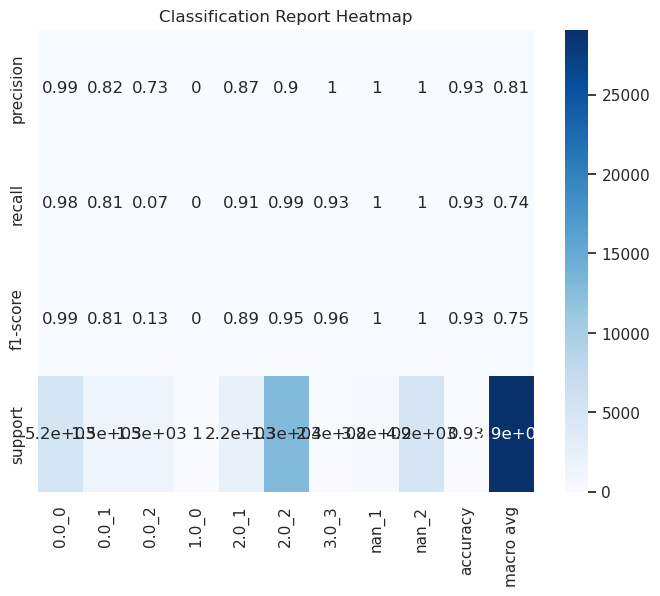

Data Quality Score: 99.98%


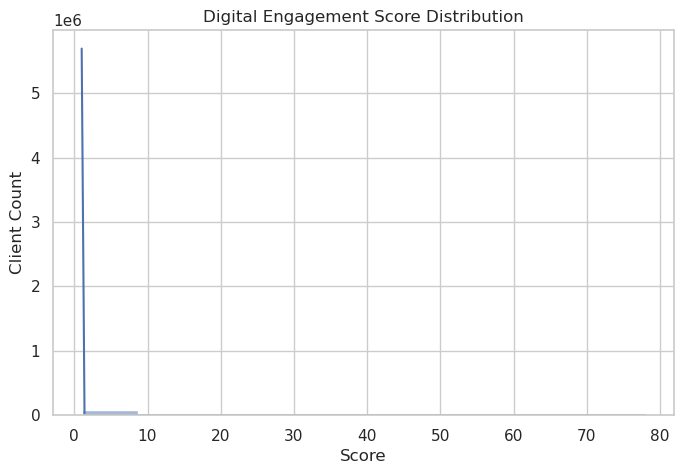


KPI Summary Table:
                            KPI  Value
                 Model Accuracy 92.85%
                      Precision 92.07%
                         Recall 92.85%
                       F1-Score 90.91%
             Data Quality Score 99.98%
Digital Engagement Score (Mean)   1.01
All KPI and model performance data exported to 'powerbi_exports/' folder.


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import os
# --- 1. Model Accuracy & Classification Report ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Model Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title("Classification Report Heatmap")
plt.show()

# --- 2. Data Quality Score ---
missing_ratio = df.isnull().mean().mean()
data_quality_score = 1 - missing_ratio
print(f"Data Quality Score: {data_quality_score:.2%}")

# --- 3. Digital Engagement Score Distribution ---
if "Digital_Engagement_Score" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df["Digital_Engagement_Score"], bins=10, kde=True)
    plt.title("Digital Engagement Score Distribution")
    plt.xlabel("Score")
    plt.ylabel("Client Count")
    plt.show()
    digital_engagement_mean = df["Digital_Engagement_Score"].mean()
else:
    print("'Digital_Engagement_Score' column not found in dataset.")
    digital_engagement_mean = "N/A"

# --- 4. Cluster Sizes ---
if "KMeans_Cluster" in df.columns:
    cluster_sizes = df["KMeans_Cluster"].value_counts().reset_index()
    cluster_sizes.columns = ["KMeans_Cluster", "Count"]
else:
    cluster_sizes = pd.DataFrame(columns=["KMeans_Cluster", "Count"])
    print("'KMeans_Cluster' column not found in dataset.")


# --- 5. Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)

# --- 6. KPI Summary Table ---
kpi_summary = pd.DataFrame({
    "KPI": [
        "Model Accuracy",
        "Precision",
        "Recall",
        "F1-Score",
        "Data Quality Score",
        "Digital Engagement Score (Mean)"
    ],
    "Value": [
        f"{accuracy:.2%}",
        f"{precision:.2%}",
        f"{recall:.2%}",
        f"{f1:.2%}",
        f"{data_quality_score:.2%}",
        f"{digital_engagement_mean:.2f}" if digital_engagement_mean != "N/A" else "N/A"
    ]
})
print("\nKPI Summary Table:")
print(kpi_summary.to_string(index=False))

# --- 7. Export to CSV for Power BI ---
os.makedirs("powerbi_exports", exist_ok=True)
kpi_summary.to_csv("powerbi_exports/kpi_summary.csv", index=False)
report_df.to_csv("powerbi_exports/classification_report.csv")
conf_matrix_df.to_csv("powerbi_exports/confusion_matrix.csv", index=False)
cluster_sizes.to_csv("powerbi_exports/cluster_sizes.csv", index=False)

print("All KPI and model performance data exported to 'powerbi_exports/' folder.")
